<a href="https://colab.research.google.com/github/KanoknatKr/bsc_dpdm24/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Try unmounting the drive first, in case it was already mounted
drive.flush_and_unmount()

# Mount the drive with force_remount=True to ensure a fresh mount
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/drive/MyDrive/bsc_dpdm24_data/apndx.csv'
apndx = pd.read_csv(file_path)

In [ ]:
apndx.head(10)

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No
5,PID_000006,USA,44,Male,21.2,No,Low,No,Yes,Hypertension,...,270,6.9,4.9,397,Negative,Mild,309,Radiation,3.7,No
6,PID_000007,USA,43,Female,26.4,No,Low,Yes,No,NaN,...,224,10.3,4.6,355,Negative,Moderate,359,Surgery,8.6,Yes
7,PID_000008,Japan,87,Female,21.3,No,Moderate,No,No,NaN,...,194,6.2,4.5,375,Negative,Moderate,479,Surgery,4.9,No
8,PID_000009,Russia,60,Male,19.7,No,High,No,No,NaN,...,165,6.3,4.9,277,Negative,Severe,402,Surgery,5.0,No
9,PID_000010,UK,47,Male,20.1,Yes,High,No,No,Hypertension,...,266,6.4,5.5,218,Negative,Mild,294,Surgery,5.0,No


In [ ]:
apndx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                129913 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [ ]:
apndx.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'BMI', 'Smoking_Status',
       'Alcohol_Consumption', 'Family_History_Cancer', 'Genetic_Mutations',
       'Chronic_Diseases', 'Physical_Activity_Level', 'Diet_Type',
       'Radiation_Exposure', 'Previous_Cancers', 'Blood_Pressure',
       'Cholesterol_Level', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count',
       'Platelet_Count', 'Tumor_Markers', 'Symptom_Severity',
       'Diagnosis_Delay_Days', 'Treatment_Type',
       'Survival_Years_After_Diagnosis', 'Appendix_Cancer_Prediction'],
      dtype='object')

In [ ]:
apndx.isnull().sum()

,0
Patient_ID,0
Country,0
Age,0
Gender,0
BMI,0
Smoking_Status,0
Alcohol_Consumption,0
Family_History_Cancer,0
Genetic_Mutations,0
Chronic_Diseases,130087


In [ ]:
apndx['Chronic_Diseases'].fillna('No', inplace=True)

<ipython-input-10-1339478c80cd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apndx['Chronic_Diseases'].fillna('No', inplace=True)


In [ ]:
apndx['Treatment_Type'].fillna('No', inplace=True)

<ipython-input-11-ae10b090ca47>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apndx['Treatment_Type'].fillna('No', inplace=True)


In [ ]:
apndx.isnull().sum()

,0
Patient_ID,0
Country,0
Age,0
Gender,0
BMI,0
Smoking_Status,0
Alcohol_Consumption,0
Family_History_Cancer,0
Genetic_Mutations,0
Chronic_Diseases,0


In [ ]:
# Check if the columns exist before dropping them
columns_to_drop = ['Diagnosis_Delay_Days', 'Treatment_Type', 'Survival_Years_After_Diagnosis', 'Patient_ID', 'Country']
existing_columns = apndx.columns

# Only drop columns that actually exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop the columns
apndx = apndx.drop(columns=columns_to_drop)

In [ ]:
apndx.head(10)

,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,67,Female,28.6,No,Low,Yes,No,Diabetes,High,Non-Vegetarian,No,No,156,228,8.1,4.4,361,Negative,Mild,Yes
1,83,Female,19.4,No,Low,No,No,Diabetes,Low,Non-Vegetarian,No,No,117,186,9.7,6.2,235,Negative,Moderate,No
2,52,Female,17.2,No,Low,Yes,No,Diabetes,Low,Non-Vegetarian,No,No,115,231,8.2,4.6,269,Negative,Moderate,No
3,71,Male,31.8,Yes,Low,No,No,No,High,Non-Vegetarian,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,No
4,19,Female,17.7,No,Low,No,No,Hypertension,Moderate,Non-Vegetarian,No,No,179,236,6.7,4.9,396,Negative,Mild,No
5,44,Male,21.2,No,Low,No,Yes,Hypertension,Low,Vegetarian,No,No,113,270,6.9,4.9,397,Negative,Mild,No
6,43,Female,26.4,No,Low,Yes,No,No,Low,Non-Vegetarian,Yes,No,144,224,10.3,4.6,355,Negative,Moderate,Yes
7,87,Female,21.3,No,Moderate,No,No,No,Low,Non-Vegetarian,No,No,94,194,6.2,4.5,375,Negative,Moderate,No
8,60,Male,19.7,No,High,No,No,No,Low,Vegetarian,No,Yes,113,165,6.3,4.9,277,Negative,Severe,No
9,47,Male,20.1,Yes,High,No,No,Hypertension,Moderate,Non-Vegetarian,Yes,No,147,266,6.4,5.5,218,Negative,Mild,No


## เเปลง data

In [ ]:
# prompt: ดู  Alcohol_Consumption ว่ามีค่าอะไรบ้าง

apndx['Gender'].unique()


array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
# Convert 'Gender' column to numerical values
#apndx['Gender'] = apndx['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

# Convert 'Smoking_Status' to numerical values
apndx['Smoking_Status'] = apndx['Smoking_Status'].map({'No': 0, 'Yes': 1})

# Convert 'Alcohol_Consumption' to numerical values
apndx['Alcohol_Consumption'] = apndx['Alcohol_Consumption'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Convert 'Family_History_Cancer' to numerical values
apndx['Family_History_Cancer'] = apndx['Family_History_Cancer'].map({'No': 0, 'Yes': 1})

# Convert 'Genetic_Mutations' to numerical values
apndx['Genetic_Mutations'] = apndx['Genetic_Mutations'].map({'No': 0, 'Yes': 1})

# Convert 'Chronic_Diseases' to numerical values
#apndx['Chronic_Diseases'] = apndx['Chronic_Diseases'].map({'No': 0, 'Diabetes': 1, 'Hypertension': 2})

# Convert 'Physical_Activity_Level' to numerical values
apndx['Physical_Activity_Level'] = apndx['Physical_Activity_Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Convert 'Diet_Type' to numerical values
#apndx['Diet_Type'] = apndx['Diet_Type'].map({'Poor': 0, 'Average': 1, 'Good': 2})

# Convert 'Radiation_Exposure' to numerical values
apndx['Radiation_Exposure'] = apndx['Radiation_Exposure'].map({'No': 0, 'Yes': 1})

# Convert 'Previous_Cancers' to numerical values
apndx['Previous_Cancers'] = apndx['Previous_Cancers'].map({'No': 0, 'Yes': 1})

# Convert 'Tumor_Markers' to numerical values
apndx['Tumor_Markers'] = apndx['Tumor_Markers'].map({'Negative': 0, 'Positive': 1})

# Convert 'Symptom_Severity' to numerical values
apndx['Symptom_Severity'] = apndx['Symptom_Severity'].map({'Mild': 0, 'Moderate': 1, 'Severe': 2})

# Convert 'Appendix_Cancer_Prediction' to numerical values
apndx['Appendix_Cancer_Prediction'] = apndx['Appendix_Cancer_Prediction'].map({'No': 0, 'Yes': 1})

apndx.head(10)


,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,67,Female,28.6,0,0,1,0,Diabetes,2,Non-Vegetarian,0,0,156,228,8.1,4.4,361,0,0,1
1,83,Female,19.4,0,0,0,0,Diabetes,0,Non-Vegetarian,0,0,117,186,9.7,6.2,235,0,1,0
2,52,Female,17.2,0,0,1,0,Diabetes,0,Non-Vegetarian,0,0,115,231,8.2,4.6,269,0,1,0
3,71,Male,31.8,1,0,0,0,No,2,Non-Vegetarian,0,1,149,151,6.8,6.0,193,0,1,0
4,19,Female,17.7,0,0,0,0,Hypertension,1,Non-Vegetarian,0,0,179,236,6.7,4.9,396,0,0,0
5,44,Male,21.2,0,0,0,1,Hypertension,0,Vegetarian,0,0,113,270,6.9,4.9,397,0,0,0
6,43,Female,26.4,0,0,1,0,No,0,Non-Vegetarian,1,0,144,224,10.3,4.6,355,0,1,1
7,87,Female,21.3,0,1,0,0,No,0,Non-Vegetarian,0,0,94,194,6.2,4.5,375,0,1,0
8,60,Male,19.7,0,2,0,0,No,0,Vegetarian,0,1,113,165,6.3,4.9,277,0,2,0
9,47,Male,20.1,1,2,0,0,Hypertension,1,Non-Vegetarian,1,0,147,266,6.4,5.5,218,0,0,0


In [ ]:
apndx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         260000 non-null  int64  
 1   Gender                      260000 non-null  object 
 2   BMI                         260000 non-null  float64
 3   Smoking_Status              260000 non-null  int64  
 4   Alcohol_Consumption         260000 non-null  int64  
 5   Family_History_Cancer       260000 non-null  int64  
 6   Genetic_Mutations           260000 non-null  int64  
 7   Chronic_Diseases            260000 non-null  object 
 8   Physical_Activity_Level     260000 non-null  int64  
 9   Diet_Type                   260000 non-null  object 
 10  Radiation_Exposure          260000 non-null  int64  
 11  Previous_Cancers            260000 non-null  int64  
 12  Blood_Pressure              260000 non-null  int64  
 13  Cholesterol_Le

In [ ]:
# prompt: transform Gender Chronic_Diseases  Diet_Type  using one-hot-endcoder

from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the categorical columns
encoder.fit(apndx[['Gender', 'Chronic_Diseases', 'Diet_Type']])

# Transform the categorical columns into one-hot encoded features
encoded_features = encoder.transform(apndx[['Gender', 'Chronic_Diseases', 'Diet_Type']])

# Create a new DataFrame with the one-hot encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Gender', 'Chronic_Diseases', 'Diet_Type']))

# Concatenate the encoded features with the original DataFrame
apndx = pd.concat([apndx, encoded_df], axis=1)

# Drop the original categorical columns
apndx = apndx.drop(['Gender', 'Chronic_Diseases', 'Diet_Type'], axis=1)

apndx.head(10)


,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Appendix_Cancer_Prediction,Gender_Female,Gender_Male,Gender_Other,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,67,28.6,0,0,1,0,2,0,0,156,...,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,83,19.4,0,0,0,0,0,0,0,117,...,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,52,17.2,0,0,1,0,0,0,0,115,...,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,71,31.8,1,0,0,0,2,0,1,149,...,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,19,17.7,0,0,0,0,1,0,0,179,...,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,44,21.2,0,0,0,1,0,0,0,113,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,43,26.4,0,0,1,0,0,1,0,144,...,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,87,21.3,0,1,0,0,0,0,0,94,...,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,60,19.7,0,2,0,0,0,0,1,113,...,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,47,20.1,1,2,0,0,1,1,0,147,...,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
split_size = int(len(apndx) * .80)

train = apndx.iloc[:split_size]
test = apndx.iloc[split_size:]
print(train.shape)
print(test.shape)

(208000, 26)
(52000, 26)


In [ ]:
train.groupby(["Appendix_Cancer_Prediction"]).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Gender_Female,Gender_Male,Gender_Other,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,176624,176624,176624,176624,176624,176624,176624,176624,176624,176624,...,176624,176624,176624,176624,176624,176624,176624,176624,176624,176624
1,31376,31376,31376,31376,31376,31376,31376,31376,31376,31376,...,31376,31376,31376,31376,31376,31376,31376,31376,31376,31376


In [ ]:
test.groupby(["Appendix_Cancer_Prediction"]).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Gender_Female,Gender_Male,Gender_Other,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,44089,44089,44089,44089,44089,44089,44089,44089,44089,44089,...,44089,44089,44089,44089,44089,44089,44089,44089,44089,44089
1,7911,7911,7911,7911,7911,7911,7911,7911,7911,7911,...,7911,7911,7911,7911,7911,7911,7911,7911,7911,7911


# Model Selection

1. Dicision Tree
2. S Dicision Tree
3. Naive Bayes

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=6)

In [ ]:
X_train = train.drop('Appendix_Cancer_Prediction', axis=1)
y_train = train['Appendix_Cancer_Prediction']

## Dicision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
cv_score = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

##S Dicision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#define
dt_classifier2 = DecisionTreeClassifier(max_depth=5)
#cross
cv_score2 = cross_val_score(dt_classifier2, X_train, y_train, cv=kf, scoring='accuracy')

In [ ]:
mean_score = cv_score.mean()
print(f"cv_score: {cv_score2}")
print(f"mean: {cv_score2.mean()}")
print(f"std: {cv_score2.std()}")

cv_score: [0.84793269 0.84947115 0.85245192 0.85019231 0.84841346 0.84975962
 0.84802885 0.85067308 0.84903846 0.84427885]
mean: 0.8490240384615385
std: 0.002040756373368406


##Naive Bayes

In [ ]:
#import
from sklearn.naive_bayes import GaussianNB
#define
nb_classifier = GaussianNB()
#cross
cv_score3 = cross_val_score(nb_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [ ]:
print(f"cv_score: {cv_score3}")
print(f"mean: {cv_score3.mean()}")
print(f"std: {cv_score3.std()}")

cv_score: [0.84802885 0.84961538 0.85245192 0.85024038 0.84855769 0.84985577
 0.84802885 0.85120192 0.84923077 0.84432692]
mean: 0.8491538461538461
std: 0.0020772569176140056


#เลือก S Dicision Tree มา train ด้วย all training data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#define
dt_classifier2 = DecisionTreeClassifier(max_depth=5)
#cross
dt_classifier2 = dt_classifier2.fit(X_train, y_train)

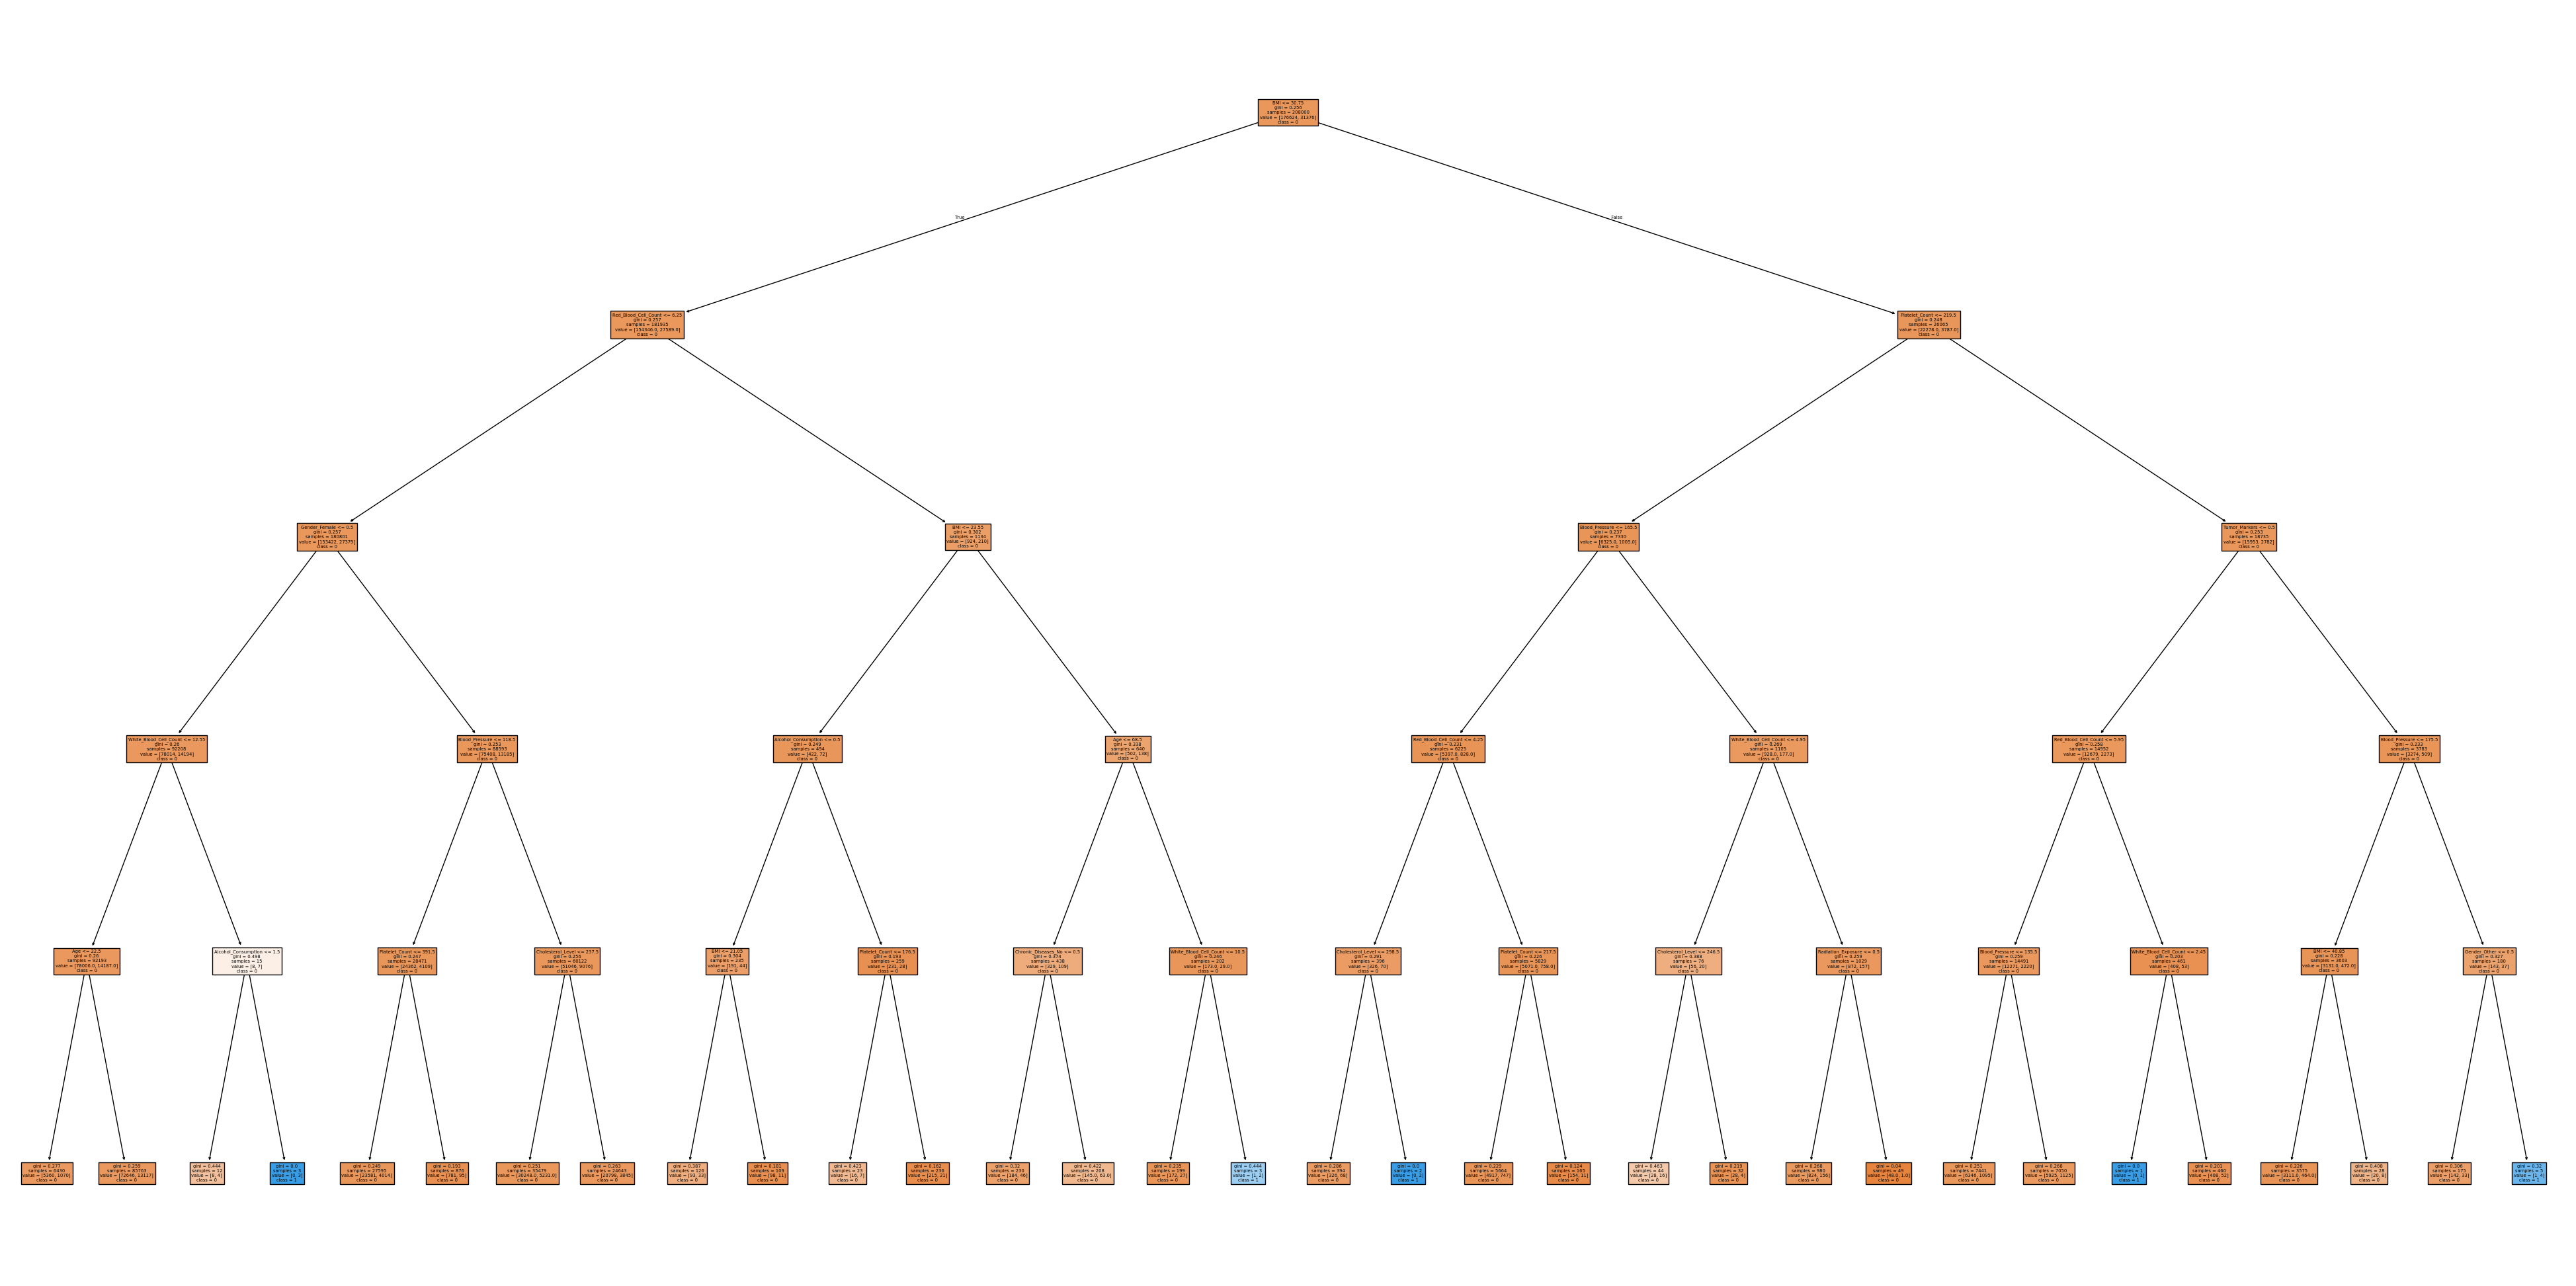

In [ ]:
# prompt: plot the trained

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dt_classifier2 is your trained DecisionTreeClassifier
plt.figure(figsize=(50,25))
plot_tree(dt_classifier2, filled=True, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

#test data

In [ ]:
X_test = test.drop('Appendix_Cancer_Prediction', axis=1)
y_actual = test['Appendix_Cancer_Prediction']

In [ ]:
#predict
y_pred = dt_classifier2.predict(X_test)

In [ ]:
#evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_actual, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8478461538461538


# Quiz12


In [ ]:
kf1 = KFold(n_splits=10, shuffle=True, random_state=6)

In [ ]:
X_train1 = train.drop('Appendix_Cancer_Prediction', axis=1)
y_train1 = train['Appendix_Cancer_Prediction']

In [ ]:
#import
from sklearn.tree import DecisionTreeClassifier
#define
dt_classifier5 = DecisionTreeClassifier(max_depth=3)
#cross
cv_score5 = cross_val_score(dt_classifier5, X_train1, y_train1, cv=kf, scoring='accuracy')

In [ ]:
mean_score = cv_score.mean()
print(f"cv_score: {cv_score5}")
print(f"mean: {cv_score5.mean()}")
print(f"std: {cv_score5.std()}")

cv_score: [0.84793269 0.84961538 0.85245192 0.85024038 0.84846154 0.84975962
 0.84802885 0.85120192 0.84923077 0.84432692]
mean: 0.8491250000000001
std: 0.0020824357040587216
